In [265]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [266]:
df = pd.read_csv("student-por.csv", delimiter  = ";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [267]:
XY = df.iloc[:,-2:]

In [268]:
XY.describe()

,G2,G3
count,649.000000,649.000000
mean,11.570108,11.906009
std,2.913639,3.230656
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,12.000000
75%,13.000000,14.000000
max,19.000000,19.000000


In [269]:
X = XY.iloc[:,0]
Y = XY.iloc[:,1]

In [270]:
print("X shape:", X.shape)
print("Y shape:", Y.shape)

X shape: (649,)
Y shape: (649,)


In [271]:
XY.head()

,G2,G3
0,11,11
1,11,11
2,13,12
3,14,14
4,13,13


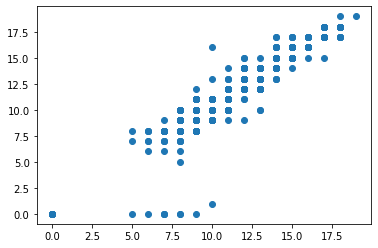

In [272]:
plt.scatter(X,Y)

In [273]:
mean_x = np.mean(X)
mean_y = np.mean(Y)
print(mean_x)
print(mean_y)

11.570107858243452
11.906009244992296


In [274]:
length = X.shape[0]
num = 0
den = 0
for i in range(length):
    num += (X[i] - mean_x) * (Y[i] - mean_y)
    den += (X[i] - mean_x) ** 2
m = num/den
c = mean_y-(m*mean_x)

print("m:", m)
print("c:", c)

m: 1.0184903428054766
c: 0.12196612615358404


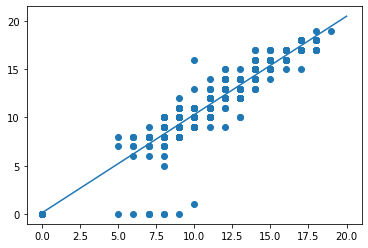

In [275]:
x = np.linspace(np.min(X), np.max(X)+1)
y = m*x + c
    
plt.plot(x, y, label='Regression Line')
plt.scatter(X, Y, label='data points')

In [276]:
def pred(x):
    y_pred = m*x + c
    return y_pred

y_arr = X
y_pred_arr = []
for i in range(length):
    uh = pred(i)
    y_pred_arr.append(uh)

In [277]:
def mse():
    MSE = 0
    for i in range(length):
        k = Y[i]
        k_bar = y
        MSE += np.square(np.subtract(k,k_bar)).mean()
    return MSE.mean()/length

In [278]:
mean_sq_error = mse()
mean_sq_error

48.96704814587293

In [279]:
from math import sqrt
sqrt(mean_sq_error)

6.997645900291964

In [281]:
y_rand = np.random.randint(np.min(X), np.max(X), size = 1000)

In [288]:
predicted_vals = pred(y_rand)
predicted_vals

array([13.36234058, 13.36234058, 18.4547923 ,  4.1959275 , 16.41781161,
        9.28837921,  4.1959275 ,  6.23290818,  9.28837921,  8.26988887,
       14.38083093, 14.38083093, 15.39932127, 15.39932127,  2.15894681,
       15.39932127, 10.30686955, 12.34385024,  6.23290818,  6.23290818,
       14.38083093,  6.23290818,  9.28837921,  7.25139853,  7.25139853,
        8.26988887,  7.25139853,  8.26988887, 17.43630195,  0.12196613,
        2.15894681, 13.36234058,  0.12196613, 17.43630195,  3.17743715,
       15.39932127,  4.1959275 , 18.4547923 , 17.43630195, 15.39932127,
        2.15894681, 16.41781161, 18.4547923 ,  4.1959275 , 11.3253599 ,
       17.43630195,  4.1959275 ,  4.1959275 , 18.4547923 , 13.36234058,
       10.30686955, 15.39932127, 14.38083093,  5.21441784, 15.39932127,
       18.4547923 , 18.4547923 , 14.38083093,  6.23290818, 14.38083093,
       13.36234058,  4.1959275 , 11.3253599 ,  6.23290818,  3.17743715,
       14.38083093, 17.43630195,  6.23290818,  6.23290818, 15.39

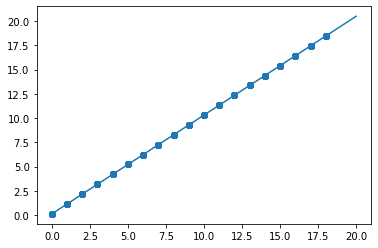

In [289]:
x = np.linspace(np.min(X), np.max(X)+1)
y = m*x + c

plt.plot(x, y, label='Regression Line')
plt.scatter(y_rand, predicted_vals, label='data points')